In [1]:
import cv2
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math

In [2]:
gridImg = cv2.imread('grid.jpg')

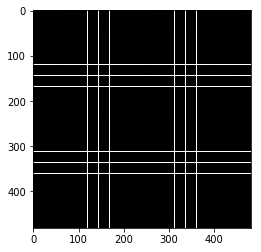

In [3]:
gridImg = cv2.cvtColor(gridImg, cv2.COLOR_RGB2GRAY)
plt.imshow(gridImg, cmap = 'gray')

In [4]:
detectCornerExpectScale = 1000
precisionOfDetection = 0.01
minimalEachCornerDistance = 10
cornersPositionData = cv2.goodFeaturesToTrack(gridImg, detectCornerExpectScale, precisionOfDetection, minimalEachCornerDistance)
print cornersPositionData

[[[ 456.  456.]]

 [[ 432.  456.]]

 [[ 408.  456.]]

 [[ 384.  456.]]

 [[ 360.  456.]]

 [[ 336.  456.]]

 [[ 312.  456.]]

 [[ 288.  456.]]

 [[ 264.  456.]]

 [[ 240.  456.]]

 [[ 216.  456.]]

 [[ 192.  456.]]

 [[ 168.  456.]]

 [[ 144.  456.]]

 [[ 120.  456.]]

 [[  96.  456.]]

 [[  72.  456.]]

 [[  48.  456.]]

 [[  24.  456.]]

 [[ 456.  432.]]

 [[ 432.  432.]]

 [[ 408.  432.]]

 [[ 384.  432.]]

 [[ 360.  432.]]

 [[ 336.  432.]]

 [[ 312.  432.]]

 [[ 288.  432.]]

 [[ 264.  432.]]

 [[ 240.  432.]]

 [[ 216.  432.]]

 [[ 192.  432.]]

 [[ 168.  432.]]

 [[ 144.  432.]]

 [[ 120.  432.]]

 [[  96.  432.]]

 [[  72.  432.]]

 [[  48.  432.]]

 [[  24.  432.]]

 [[ 456.  408.]]

 [[ 432.  408.]]

 [[ 408.  408.]]

 [[ 384.  408.]]

 [[ 360.  408.]]

 [[ 336.  408.]]

 [[ 312.  408.]]

 [[ 288.  408.]]

 [[ 264.  408.]]

 [[ 240.  408.]]

 [[ 216.  408.]]

 [[ 192.  408.]]

 [[ 168.  408.]]

 [[ 144.  408.]]

 [[ 120.  408.]]

 [[  96.  408.]]

 [[  72.  408.]]

 [[  48.  

In [5]:
cornersPositionDataFiltered = np.int0(cornersPositionData)
print cornersPositionDataFiltered

[[[456 456]]

 [[432 456]]

 [[408 456]]

 [[384 456]]

 [[360 456]]

 [[336 456]]

 [[312 456]]

 [[288 456]]

 [[264 456]]

 [[240 456]]

 [[216 456]]

 [[192 456]]

 [[168 456]]

 [[144 456]]

 [[120 456]]

 [[ 96 456]]

 [[ 72 456]]

 [[ 48 456]]

 [[ 24 456]]

 [[456 432]]

 [[432 432]]

 [[408 432]]

 [[384 432]]

 [[360 432]]

 [[336 432]]

 [[312 432]]

 [[288 432]]

 [[264 432]]

 [[240 432]]

 [[216 432]]

 [[192 432]]

 [[168 432]]

 [[144 432]]

 [[120 432]]

 [[ 96 432]]

 [[ 72 432]]

 [[ 48 432]]

 [[ 24 432]]

 [[456 408]]

 [[432 408]]

 [[408 408]]

 [[384 408]]

 [[360 408]]

 [[336 408]]

 [[312 408]]

 [[288 408]]

 [[264 408]]

 [[240 408]]

 [[216 408]]

 [[192 408]]

 [[168 408]]

 [[144 408]]

 [[120 408]]

 [[ 96 408]]

 [[ 72 408]]

 [[ 48 408]]

 [[ 24 408]]

 [[456 384]]

 [[432 384]]

 [[408 384]]

 [[384 384]]

 [[360 384]]

 [[336 384]]

 [[312 384]]

 [[288 384]]

 [[264 384]]

 [[240 384]]

 [[216 384]]

 [[192 384]]

 [[168 384]]

 [[144 384]]

 [[120

In [6]:
for indexOfEachCornerPosition in cornersPositionDataFiltered:
    positionX, positionY = indexOfEachCornerPosition.ravel()
    cv2.circle(gridImg, (positionX, positionY), 3, (255, 0, 0), -1)

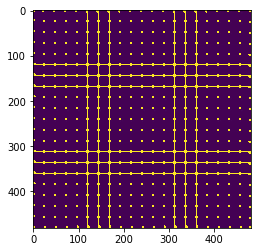

In [7]:
plt.imshow(gridImg)

In [8]:
startPosition = [10, 10] # y : 10, x : 10
endPosition = [2, 2] # y : 5, x : 5
eachPixelLength = 1 #1cm
detectedCornerWidthNums = 21
detectedCornerHeightNums = 21
crossPixelPosition = []

In [9]:
def ConvertPositionToArrayAddress(position, heightScale):
    return position[0] * heightScale + position[1]

In [10]:
def GetPixelPositionFromArrayAddress(cornerData, address):
    return cornerData[address].ravel()

In [11]:
startPositionPixelX, startPositionPixelY = GetPixelPositionFromArrayAddress(cornersPositionDataFiltered, 
                                                  ConvertPositionToArrayAddress(startPosition, detectedCornerHeightNums))
cv2.circle(gridImg, (startPositionPixelX, startPositionPixelY), 3, (0, 255, 0), -1)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ..., 
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [12]:
crossPixelPosition.append(startPositionPixelX)

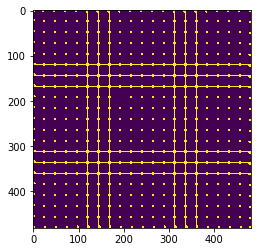

In [14]:
plt.imshow(gridImg)

In [16]:
endPositionPixelX, endPositionPixelY = GetPixelPositionFromArrayAddress(cornersPositionDataFiltered, 
                                                  ConvertPositionToArrayAddress(endPosition, detectedCornerHeightNums))
cv2.circle(gridImg, (endPositionPixelX, endPositionPixelY), 3, (0, 0, 255), -1)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ..., 
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [17]:
crossPixelPosition.append(endPositionPixelY)

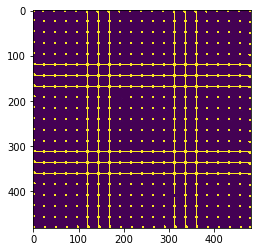

In [19]:
plt.imshow(gridImg)

In [21]:
cv2.circle(gridImg, (crossPixelPosition[0], crossPixelPosition[1]), 3, (255, 0, 255), -1)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ..., 
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

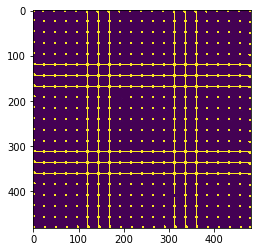

In [22]:
plt.imshow(gridImg)

In [23]:
print startPositionPixelX, startPositionPixelY, endPositionPixelX, endPositionPixelY, crossPixelPosition

192 192 312 408 [192, 408]


In [24]:
xCoordinateBlockNums = 0
for indexOfCornerData in cornersPositionDataFiltered:
    pixelX, pixelY = indexOfCornerData.ravel()
    if crossPixelPosition[0] <= pixelX and pixelX <= endPositionPixelX and pixelY == crossPixelPosition[1]:
        print pixelX, pixelY
        xCoordinateBlockNums += 1
print xCoordinateBlockNums

312 408
288 408
264 408
240 408
216 408
192 408
6


In [25]:
yCoordinateBlockNums = 0
for indexOfCornerData in cornersPositionDataFiltered:
    pixelX, pixelY = indexOfCornerData.ravel()
    if startPositionPixelY <= pixelY and pixelY <= crossPixelPosition[1] and pixelX == crossPixelPosition[0]:
        print pixelX, pixelY
        yCoordinateBlockNums += 1
print yCoordinateBlockNums

192 408
192 384
192 360
192 336
192 312
192 288
192 264
192 240
192 216
192 192
10


In [26]:
resultDistance = math.sqrt(xCoordinateBlockNums * xCoordinateBlockNums + yCoordinateBlockNums * yCoordinateBlockNums) * eachPixelLength
print resultDistance, "cm"

11.6619037897 cm


In [27]:
cv2.line(gridImg, (startPositionPixelX, startPositionPixelY), (endPositionPixelX, endPositionPixelY), (255, 255, 255))

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ..., 
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

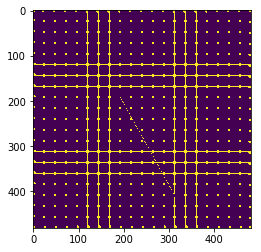

In [28]:
plt.imshow(gridImg)